# Gathering Data

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
# read twitter-archive-enhanced.csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#read image-predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
#loads the image-predictions.tsv file to DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

## because my request has been rejected from Twitter’s Developer; I use 'tweet-json.txt'.

In [5]:
#Create new dataframe with tweet_id, retweet_count, and favorite_count.
tweet_json = open('tweet-json.txt', 'r')
tweet_data = pd.DataFrame(columns=['tweet_id', 'retweets', 'favorites'])
#loads the json content into a dataframe
for line in tweet_json:
    tweet = json.loads(line)
    tweet_data = tweet_data.append({'tweet_id': tweet['id'], 'retweets': tweet['retweet_count'], 'favorites': tweet['favorite_count']}, ignore_index=True)
tweet_json.close()

tweet_data.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [6]:
tweet_data['favorites'] = tweet_data['favorites'].astype('int64')

In [7]:
tweet_data['retweets'] = tweet_data['retweets'].astype('int64')

# Assessing Data

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
type(twitter_archive.timestamp[1])

str

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
retweets     2354 non-null int64
favorites    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [12]:
type(tweet_data.retweets[0])

numpy.int64

In [13]:
type(tweet_data.tweet_id[0])

int

In [14]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
an             7
Buddy          7
Daisy          7
Toby           7
Bella          6
Jax            6
Rusty          6
Leo            6
Jack           6
Oscar          6
Scout          6
Dave           6
Stanley        6
Koda           6
Milo           6
Bentley        5
            ... 
Bertson        1
Leonidas       1
Cheesy         1
Horace         1
Oreo           1
Swagger        1
Harrison       1
Siba           1
Spencer        1
Bayley         1
Zoe            1
Dante          1
Dwight         1
Kloey          1
Biden          1
Jeffrie        1
Maxwell        1
Crouton        1
Yoda           1
Jomathan       1
Charleson      1
Liam           1
Snoop          1
Kayla          1
Travis         1
Aubie          1
Jazzy          1
Lupe          

In [15]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
sum(twitter_archive.tweet_id.duplicated())

0

In [17]:
sum(image_predictions.tweet_id.duplicated())

0

In [18]:
sum(tweet_data.tweet_id.duplicated())

0

In [19]:
twitter_archive[twitter_archive['name']=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [20]:
twitter_archive.name[775]

'O'

In [21]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Quality Issues

1.timestamp column has type int instead of DateTime type in twitter_archive.

2.tweet_id column has type int instead of String type in twitter_archive and image_predictions and tweet_data.

3.Wrong entries in the name column as 'a', 'an', 'the'... in twitter_archive.

4.Missing value name in twitter_archive recorded as 'None' string instead of NaN.

5.source column has some prefix and suffix in twitter_archive.

6.the rating_denominators are inconsistent in twitter_archive.

7.Unnecessary entries where p1_dog, p2_dog, and p3_dog are all "False" in image_predictions.

8.Incorrectly entered name as 'O' in twitter_archive instead of O'malley.

9.Tweets in twitter_archive some are retweets.

10.Columns pertaining to retweets and expanded URLs are unnecessary in twitter_archive.


### Tidiness Issues

1.Doggo, floofer, pupper, puppo are one variable spread in different columns in twitter_archive.

2.Data Frames are seperated, but they contain the same observations.

# Cleaning Data

In [22]:
#Copies of the original pieces of data.
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweet_data_copy = tweet_data.copy()

#### 1.timestamp column has type int instead of DateTime type in twitter_archive.(Quality Issue)

##### Define
convert timestamp column type to datetime type, using pd.to_datetime().

#### Code

In [23]:
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

#### Test

In [24]:
type(twitter_archive_copy.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

#     



#### 2.tweet_id column has type int instead of String type in twitter_archive and image_predictions and tweet_data.(Quality Issue)

#### Define
convert tweet_id column type to String type, using DataFrame.astype(str).

#### Code

In [25]:
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

In [26]:
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype(str)

In [27]:
tweet_data_copy['tweet_id'] = tweet_data_copy['tweet_id'].astype(str)

#### Test

In [28]:
type(twitter_archive_copy.tweet_id[0])

str

In [29]:
type(image_predictions_copy.tweet_id[0])

str

In [30]:
type(tweet_data_copy.tweet_id[0])

str

#     




#### 3.Wrong entries in the name column as 'a', 'an', 'the' in twitter_archive.(Quality Issue)

##### Define
convert 'a', 'an', 'the'and no-names in column name to 'None'.

#### Code

In [31]:
# get all unique names that do not start with uppper case 
not_names = twitter_archive_copy[~twitter_archive_copy.name.str.istitle() & ~twitter_archive_copy.name.str.isupper()]
not_names.name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'DayZ'], dtype=object)

In [32]:
# Create set of words that are not names and use it filter 'name' columns off them.
false_names = ['just', 'one', 'his', 'a', 'mad', 'actually', 'all', 'the', 'such',
       'quite', 'not', 'incredibly','an', 'very', 'my',
       'getting', 'this', 'unacceptable', 'old', 'infuriating',
       'by', 'officially', 'life', 'light', 'space']

tw_clean = twitter_archive_copy.set_value(twitter_archive_copy.name.isin(false_names), 'name', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


#### Test

In [33]:
twitter_archive_copy[twitter_archive_copy.name.str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [34]:
twitter_archive_copy[twitter_archive_copy['name']=='JD']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [35]:
twitter_archive_copy[twitter_archive_copy['name']=='JD'].expanded_urls

2041    https://twitter.com/dog_rates/status/671542985...
Name: expanded_urls, dtype: object

##### this tweet has removed I will drop it.

In [36]:
twitter_archive_copy.drop(index=2041, inplace = True)

In [37]:
twitter_archive_copy[twitter_archive_copy['name']=='JD']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#     




#### 4.Missing value name in twitter_archive recorded as 'None' string instead of NaN.(Quality Issue)

##### Define
convert None in column name to NaN, using replace('None',np.nan).

#### Code

In [38]:
twitter_archive_copy['name']=twitter_archive_copy['name'].replace('None',np.nan)

#### Test

In [39]:
twitter_archive_copy[twitter_archive_copy['name']== 'None'].shape[0]

0

#     




#### 5.source column has some prefix and suffix in twitter_archive.(Quality Issue)

##### Define
remove prefix and suffix from source column, using .replace(,).

#### Code

In [40]:
twitter_archive_copy['source']= twitter_archive_copy['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')

In [41]:
twitter_archive_copy['source']= twitter_archive_copy['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')

In [42]:
twitter_archive_copy['source']= twitter_archive_copy['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')

In [43]:
twitter_archive_copy['source']= twitter_archive_copy['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

#### Test

In [44]:
twitter_archive_copy.source.value_counts()

Twitter for iPhone     2220
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#     




#### 6.the rating_denominators are inconsistent in twitter_archive.(Quality Issue)

##### Define
remove entries where rating_denominator not equal 10.

#### Code

In [45]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['rating_denominator']==10]

#### Test

In [46]:
twitter_archive_copy.rating_denominator.value_counts()

10    2332
Name: rating_denominator, dtype: int64

#     




#### 7.Unnecessary entries where p1_dog, p2_dog, and p3_dog are all "False" in image_predictions.(Quality Issue)

##### Define
remove entries where p1_dog, p2_dog, and p3_dog are all "False".

#### Code

In [47]:
image_predictions_copy = image_predictions_copy.query('p1_dog == True or p2_dog == True or p3_dog == True')

#### Test

In [48]:
image_predictions_copy.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#     




#### 8.Incorrectly entered name as 'O' in twitter_archive instead of O'Malley.(Quality Issue)

#### Define
replace 'O' with "O'Malley" in twitter_archive.name[775].

#### Code 

In [49]:
twitter_archive.name[775]= "O'Malley"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [50]:
twitter_archive.name[775]

"O'Malley"

In [51]:
twitter_archive[twitter_archive['name']=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#     




#### 9.Tweets in twitter_archive some are retweets.(Quality Issue)

#### Define
remove entries that are retweets in twitter_archive.

#### Code

In [52]:
twitter_archive_copy = twitter_archive_copy.query('retweeted_status_id == "NaN"')

#### Test

In [53]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2152 non-null object
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2152 non-null datetime64[ns]
source                        2152 non-null object
text                          2152 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2098 non-null object
rating_numerator              2152 non-null int64
rating_denominator            2152 non-null int64
name                          1387 non-null object
doggo                         2152 non-null object
floofer                       2152 non-null object
pupper                        2152 non-null object
puppo                         2152 non-null object
dtypes: datetime64[ns](1), fl

#     




#### 10.Columns pertaining to retweets and expanded URLs are unnecessary for analysis in twitter_archive.(Quality Issue)

#### Define
remove columns ('retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls') using DataFrame.drop()

#### Code

In [54]:
twitter_archive_copy.drop(columns=['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], inplace=True)

#### Test

In [55]:
twitter_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


#     




#     






#     








#### 1.Doggo, floofer, pupper, puppo are one variable spread in different columns in twitter_archive.(Tidiness Issues)

#### Define
create dog_stage column that contains the contents of columns doggo, floofer, pupper, puppo.

#### Code

In [56]:
twitter_archive_copy['doggo']=twitter_archive_copy['doggo'].replace('None','')

In [57]:
twitter_archive_copy['floofer']=twitter_archive_copy['floofer'].replace('None','')

In [58]:
twitter_archive_copy['pupper']=twitter_archive_copy['pupper'].replace('None','')

In [59]:
twitter_archive_copy['puppo']=twitter_archive_copy['puppo'].replace('None','')

In [60]:
twitter_archive_copy['dog_stage']=twitter_archive_copy['doggo']+twitter_archive_copy['floofer']+twitter_archive_copy['pupper']+twitter_archive_copy['puppo']

In [61]:
twitter_archive_copy = twitter_archive_copy.drop(['doggo', 'floofer','pupper','puppo'], axis=1)

#### Test 

In [62]:
twitter_archive_copy.dog_stage.value_counts()

                1808
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

## New Quality Issues in dog_stage :


### 1.Missing value recorded as '' string instead of NaN.
### 2.incorrect format for ('doggopupper', 'doggopuppo' and 'doggofloofer').

#     




#### 1.Missing value recorded as '' string instead of NaN.

##### Define
convert '' in column dog_stage to NaN, using replace('',np.nan).

#### Code

In [63]:
twitter_archive_copy['dog_stage']=twitter_archive_copy['dog_stage'].replace('',np.nan)

#### Test

In [64]:
twitter_archive_copy.dog_stage.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

#     




#### 2.incorrect format for ('doggopupper', 'doggopuppo' and 'doggofloofer').

##### Define
Separate each composite stage with a comma, using replace(,).

#### Code

In [65]:
twitter_archive_copy['dog_stage']=twitter_archive_copy['dog_stage'].replace('doggopupper','doggo, pupper')

In [66]:
twitter_archive_copy['dog_stage']=twitter_archive_copy['dog_stage'].replace('doggofloofer','doggo, floofer')

In [67]:
twitter_archive_copy['dog_stage']=twitter_archive_copy['dog_stage'].replace('doggopuppo','doggo, puppo')

#### Test

In [68]:
twitter_archive_copy.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

#     




### 2.Data Frames are seperated, but they contain the same observations.(Tidiness Issues)

#### Define
Joining the 3 dataframes in one master dataframe on the 'tweet_id' .

#### Code

In [69]:
twitter_archive_master = pd.merge(twitter_archive_copy, image_predictions_copy, on=['tweet_id'])

In [70]:
twitter_archive_master = pd.merge(twitter_archive_master, tweet_data_copy, on=['tweet_id'])

#### Test

In [71]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,NaN,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562


In [72]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 1667
Data columns (total 23 columns):
tweet_id                 1668 non-null object
in_reply_to_status_id    19 non-null float64
in_reply_to_user_id      19 non-null float64
timestamp                1668 non-null datetime64[ns]
source                   1668 non-null object
text                     1668 non-null object
rating_numerator         1668 non-null int64
rating_denominator       1668 non-null int64
name                     1183 non-null object
dog_stage                260 non-null object
jpg_url                  1668 non-null object
img_num                  1668 non-null int64
p1                       1668 non-null object
p1_conf                  1668 non-null float64
p1_dog                   1668 non-null bool
p2                       1668 non-null object
p2_conf                  1668 non-null float64
p2_dog                   1668 non-null bool
p3                       1668 non-null object
p3_conf            

## Store the twitter_archive_master DataFrame in a CSV file

In [73]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Insights

#### 1.the most source type used from WeRateDogs. (Twitter for iPhone)

In [74]:
twitter_archive_master['source'].value_counts()

Twitter for iPhone    1637
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

#### 2.dog stage has received the highest retweets. (pupper)

In [75]:
twitter_archive_master.groupby('dog_stage')['retweets'].sum()

dog_stage
doggo             381233
doggo, floofer      3433
doggo, pupper      34190
doggo, puppo       19196
floofer            34781
pupper            406042
puppo             133891
Name: retweets, dtype: int64

#### 3.most common dog's names.

In [76]:
twitter_archive_master.name.value_counts().head(10)

Cooper     10
Lucy       10
Charlie    10
Tucker      9
Oliver      9
Penny       8
Sadie       7
Winston     7
Daisy       7
Toby        6
Name: name, dtype: int64

#### 4.dog stage has received the highest favorites on average. ('doggo, puppo')

In [77]:
stage_favorites_avg = twitter_archive_master.groupby(['dog_stage'])['favorites'].mean()

In [78]:
stage_favorites_avg.to_frame()

,favorites
dog_stage,
doggo,19404.240741
"doggo, floofer",17169.000000
"doggo, pupper",13007.875000
"doggo, puppo",47844.000000
floofer,13206.000000
pupper,7516.821429
puppo,21457.809524


In [79]:
stage_favorites_avg1 = stage_favorites_avg.reset_index(level=['dog_stage'])
stage_favorites_avg1.sort_values(by='favorites', ascending=False)

,dog_stage,favorites
3,"doggo, puppo",47844.000000
6,puppo,21457.809524
0,doggo,19404.240741
1,"doggo, floofer",17169.000000
4,floofer,13206.000000
2,"doggo, pupper",13007.875000
5,pupper,7516.821429


Text(0,0.5,'Average Favorites')

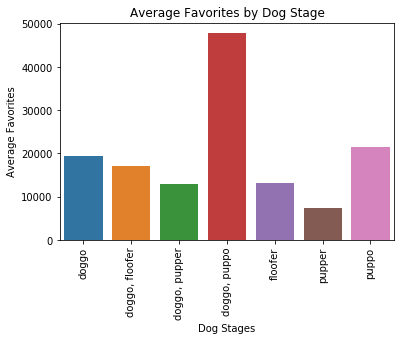

In [80]:
g = sns.barplot(data=stage_favorites_avg1, x="dog_stage", y="favorites")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax = plt.gca()
ax.set_title("Average Favorites by Dog Stage")
plt.xlabel("Dog Stages")
plt.ylabel("Average Favorites")